In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import sys
sys.path.insert(0, "./build")
import pyoptimizer

In [ ]:
def quad(v):    
    return v[0]**2 + v[1]**2

def quad_grad(v): 
    return [2*v[0], 2*v[1]]

def rosen(v):
    x, y = v
    return (1 - x)**2 + 100*(y - x**2)**2
    
def rosen_grad(v):
    x, y = v
    return [-2*(1 - x) - 400*x*(y - x**2), 200*(y - x**2)]

In [ ]:

def run_cpp(opt, f, g, x0, **kw):
    sol = opt.minimize(f, g, list(x0), **kw)
    hist = opt.get_history()             # list of Record
    traj = np.array([rec.x for rec in hist])
    return np.asarray(sol), traj

In [16]:
gd = pyoptimizer.GradientDescentOptimizer(0.001)

sol_cpp, traj_cpp = run_cpp(
    gd, 
    rosen, 
    rosen_grad, 
    x0=[1.0, -2.0],
    max_iterations=10000, 
    tolerance=1e-8
    )

print("C++ GD solution:", sol_cpp, "iters:", len(traj_cpp)-1)

C++ GD solution: [0.99437582 0.98876068] iters: 9999


In [22]:
scipy_traj = []
def cb(xk): 
    scipy_traj.append(xk.copy())

res = opt.minimize(
    rosen, 
    [1.0, -2.0], 
    method="BFGS", 
    tol=1e-8, 
    callback=cb
    )

scipy_traj = np.vstack(scipy_traj) if scipy_traj else res.x[None]
print("SciPy solution:", res.x, "iters:", res.nit)

SciPy solution: [0.99999784 0.99999559] iters: 27


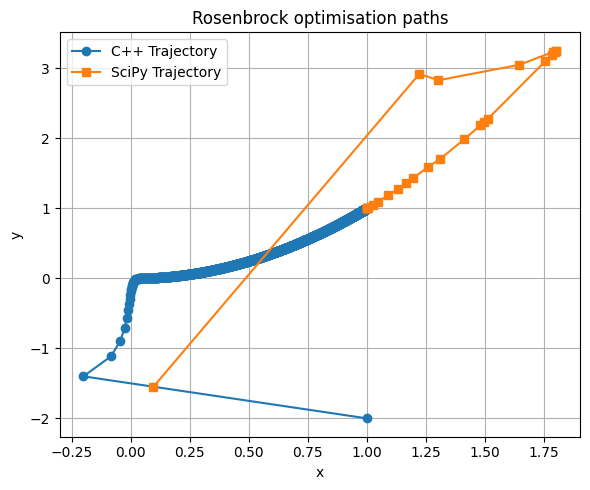

In [25]:
plt.figure(figsize=(6, 5))
plt.plot(traj_cpp[:,0],    traj_cpp[:,1],    marker="o", linewidth=1.5, label="C++ Trajectory")
plt.plot(scipy_traj[:,0],  scipy_traj[:,1],  marker="s", linewidth=1.5, label="SciPy Trajectory")

plt.title("Rosenbrock optimisation paths")
plt.xlabel("x") 
plt.ylabel("y")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()